In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
#from datetime import daretime
import re

In [3]:
traffic_data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [4]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic_data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [6]:
traffic_data['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [7]:
traffic_data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [8]:
traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


# data cleaning

In [9]:
traffic_data.replace("None","No special day",inplace=True)

In [10]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,No special day,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,No special day,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,No special day,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,No special day,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,No special day,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# 1)traffic behaviour by holiday

<IPython.core.display.Javascript object>


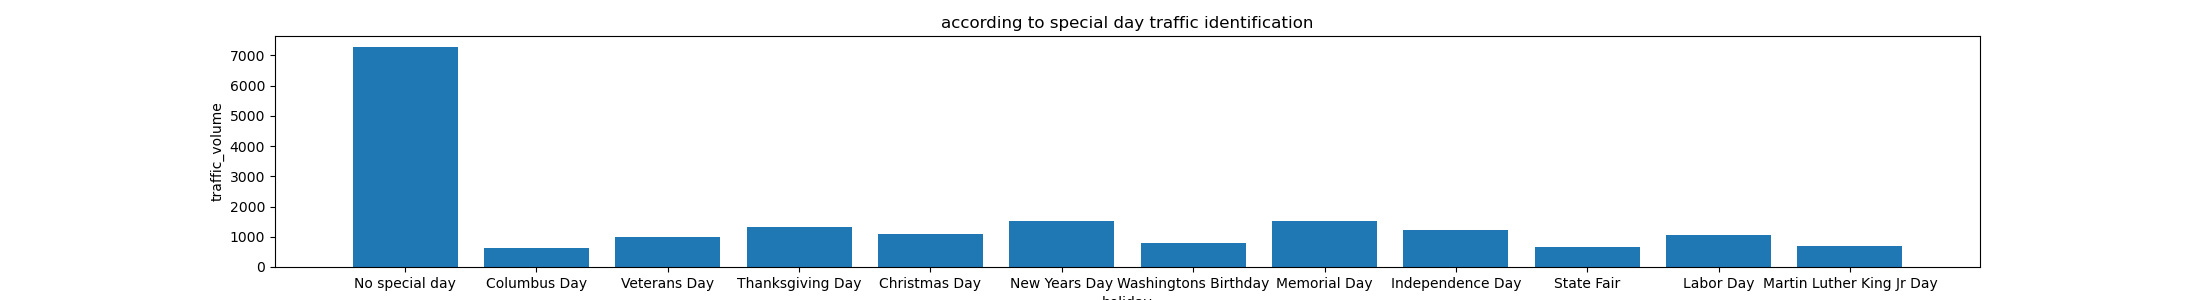

In [11]:
holiday=traffic_data["holiday"]
traffic_volume=traffic_data["traffic_volume"]
plt.figure(figsize=(22,3))
plt.bar(holiday,traffic_volume)
plt.xlabel("holiday")
plt.ylabel("traffic_volume")
plt.title("according to special day traffic identification")
plt.show()

# conclusion:

when there is no special time there is a lot of traffic.

# 2)traffic behavioue by data_time

In [12]:
traffic_data['date_time'].value_counts()

2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2012-12-16 21:00:00    5
2012-10-25 15:00:00    5
2013-12-16 10:00:00    5
                      ..
2015-07-03 20:00:00    1
2015-07-03 21:00:00    1
2015-07-03 22:00:00    1
2015-07-03 23:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

In [13]:
a=traffic_data.sort_values("traffic_volume",ascending=False)

In [14]:
a

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
31615,No special day,270.75,0.0,0.0,90,Clouds,overcast clouds,2017-03-09 16:00:00,7280
22640,No special day,284.98,0.0,0.0,90,Mist,mist,2016-04-21 07:00:00,7260
22641,No special day,284.98,0.0,0.0,90,Rain,moderate rain,2016-04-21 07:00:00,7260
22671,No special day,279.75,0.0,0.0,0,Clear,Sky is Clear,2016-04-22 07:00:00,7241
5619,No special day,281.85,0.0,0.0,1,Clear,sky is clear,2013-04-30 07:00:00,7217
...,...,...,...,...,...,...,...,...,...
26442,No special day,293.86,0.0,0.0,75,Clouds,broken clouds,2016-09-08 03:00:00,1
26438,No special day,294.08,0.0,0.0,1,Clear,sky is clear,2016-09-07 23:00:00,1
25187,No special day,297.48,0.0,0.0,40,Clouds,scattered clouds,2016-07-23 19:00:00,1
25191,No special day,295.90,0.0,0.0,90,Haze,haze,2016-07-23 23:00:00,0


In [15]:
b=traffic_data.sort_values("traffic_volume",ascending=True)

In [16]:
b

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
25186,No special day,296.68,0.0,0.0,40,Rain,light rain,2016-07-23 18:00:00,0
25191,No special day,295.90,0.0,0.0,90,Haze,haze,2016-07-23 23:00:00,0
24821,No special day,294.63,0.0,0.0,40,Clouds,scattered clouds,2016-07-09 23:00:00,1
16849,No special day,295.27,0.0,0.0,1,Clear,sky is clear,2015-07-25 08:00:00,1
26438,No special day,294.08,0.0,0.0,1,Clear,sky is clear,2016-09-07 23:00:00,1
...,...,...,...,...,...,...,...,...,...
5619,No special day,281.85,0.0,0.0,1,Clear,sky is clear,2013-04-30 07:00:00,7217
22671,No special day,279.75,0.0,0.0,0,Clear,Sky is Clear,2016-04-22 07:00:00,7241
22640,No special day,284.98,0.0,0.0,90,Mist,mist,2016-04-21 07:00:00,7260
22641,No special day,284.98,0.0,0.0,90,Rain,moderate rain,2016-04-21 07:00:00,7260


In [17]:
traffic_data["traffic_volume"].max()

7280

In [18]:
traffic_data["traffic_volume"].min()

0

In [19]:
traffic_data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [20]:
traffic_data[traffic_data["traffic_volume"]>=7270]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
31615,No special day,270.75,0.0,0.0,90,Clouds,overcast clouds,2017-03-09 16:00:00,7280


In [21]:
traffic_data[traffic_data["traffic_volume"]==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
25186,No special day,296.68,0.0,0.0,40,Rain,light rain,2016-07-23 18:00:00,0
25191,No special day,295.90,0.0,0.0,90,Haze,haze,2016-07-23 23:00:00,0


In [22]:
traffic_data[(traffic_data["traffic_volume"]>=3259.81)&(traffic_data['traffic_volume']<=3260)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
17219,No special day,297.29,0.0,0.0,75,Rain,light rain,2015-08-08 20:00:00,3260
17613,No special day,295.54,0.0,0.0,1,Clear,sky is clear,2015-08-21 20:00:00,3260
18421,No special day,288.18,0.0,0.0,1,Haze,haze,2015-09-19 20:00:00,3260
18422,No special day,288.18,0.0,0.0,1,Mist,mist,2015-09-19 20:00:00,3260
22751,No special day,286.19,0.0,0.0,90,Mist,mist,2016-04-24 19:00:00,3260
22752,No special day,286.19,0.0,0.0,90,Rain,light rain,2016-04-24 19:00:00,3260
22753,No special day,286.19,0.0,0.0,90,Haze,haze,2016-04-24 19:00:00,3260
23917,No special day,290.68,0.0,0.0,75,Rain,light rain,2016-06-03 21:00:00,3260
33937,No special day,290.15,0.0,0.0,75,Clouds,broken clouds,2017-05-22 19:00:00,3260
37598,No special day,290.22,0.0,0.0,1,Clear,sky is clear,2017-09-30 20:00:00,3260


# conclusion:

1)maximum traffic is at16:00:00 i.e4pm
2)medium traffic is at20:00:00 i.e8pm
3)mnimum traffic is at18:00:00i.e23:00:00

In [23]:
traffic_data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7084\4136739081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic_data.corr()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


<IPython.core.display.Javascript object>


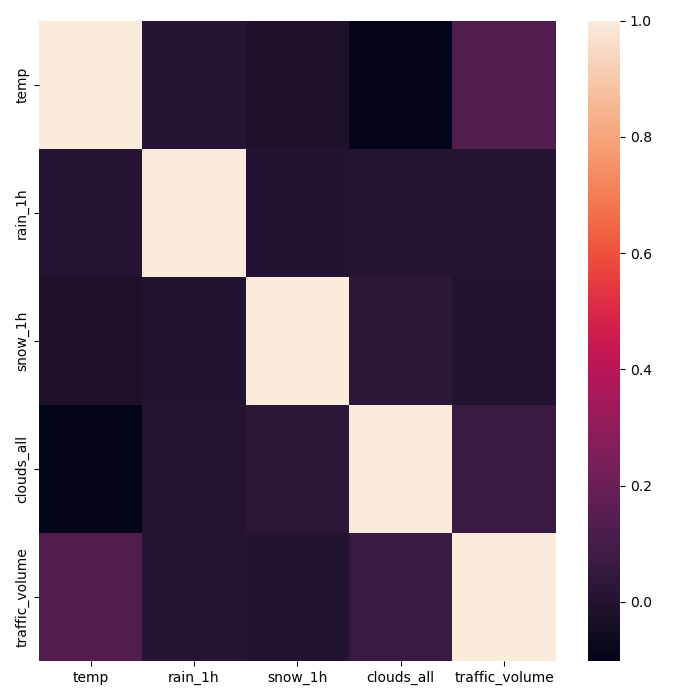

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7084\3729989524.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=traffic_data.corr(),annot=False)


In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(data=traffic_data.corr(),annot=False)
plt.tight_layout()
plt.show()

# 3)traffic behaviour by temp,rain,snow and cloudy atmosphere.

<IPython.core.display.Javascript object>


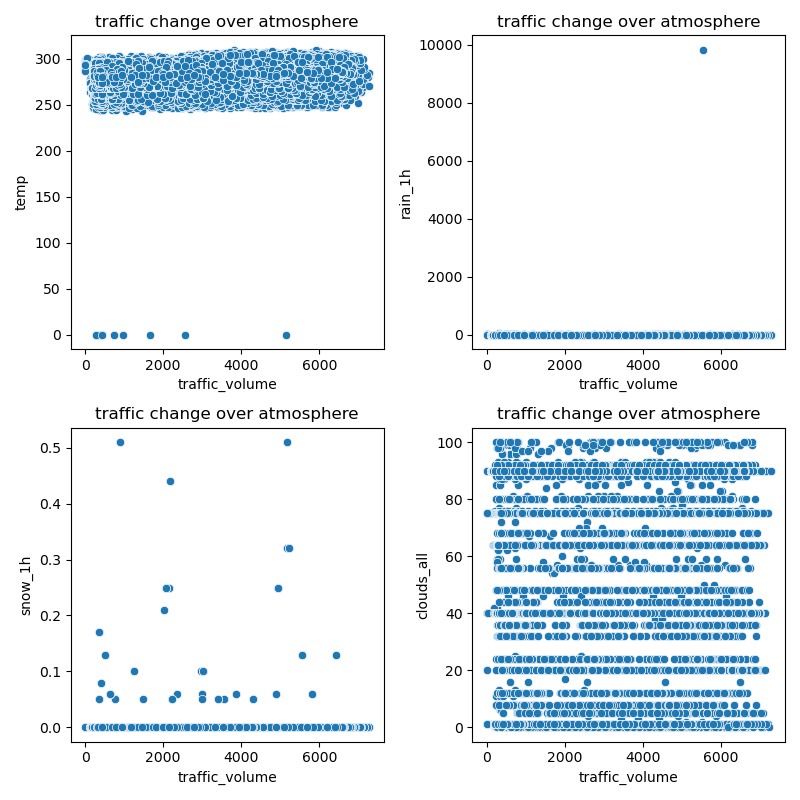

In [25]:
var_cols = ["temp","rain_1h","snow_1h","clouds_all"]
plot=0
fig=plt.figure(figsize=(8,8))
for i in range(len(var_cols)):
    plot+=1
    ax=plt.subplot(2,2,plot)
    sns.scatterplot(x=traffic_data['traffic_volume'],y=traffic_data[var_cols[i]])
    plt.title('traffic change over atmosphere')
    plt.tight_layout()
    plt.show()


 conclision: it seems to diffiult to predict relationship betweenvariavles in above plit so ketsplit regressopn plot.

<IPython.core.display.Javascript object>


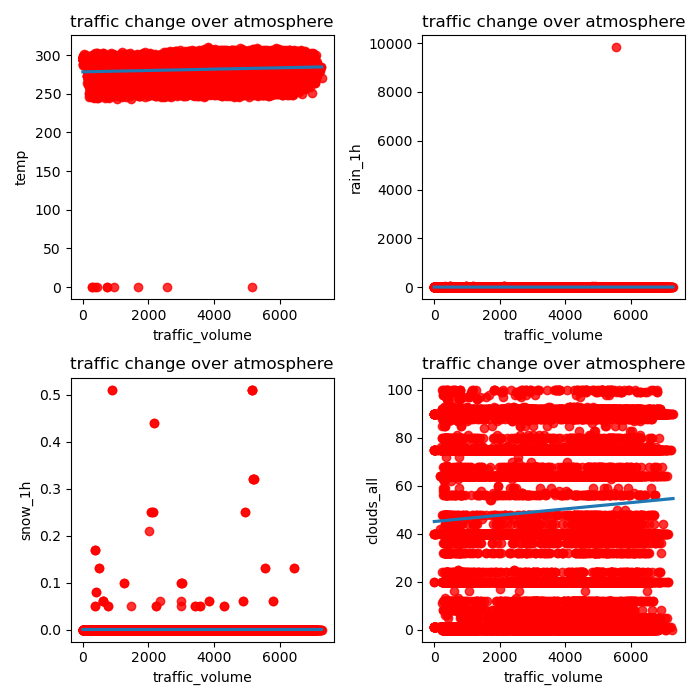

In [26]:
var_cols = ["temp","rain_1h","snow_1h","clouds_all"]
plot=0
fig=plt.figure(figsize=(7,7))
for i in range(len(var_cols)):
    plot+=1
    ax=plt.subplot(2,2,plot)
    sns.regplot(x=traffic_data['traffic_volume'],y=traffic_data[var_cols[i]],scatter_kws={"color":"red"})
    plt.title('traffic change over atmosphere')
    plt.tight_layout()
    plt.show()

# line plot of temp,rain,snow,cliudy atmosphere and trffic_volums.

<IPython.core.display.Javascript object>


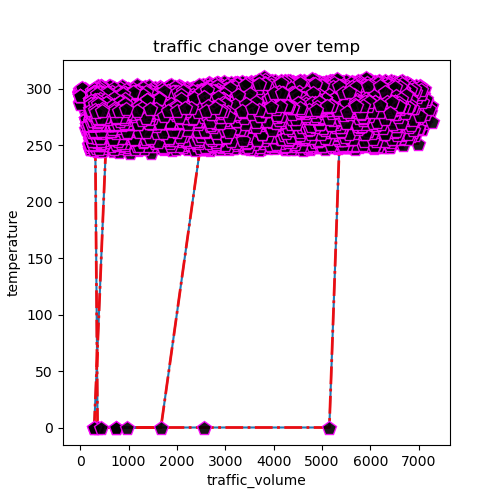

In [28]:
x=traffic_data["traffic_volume"]
y=traffic_data["temp"]
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,y,color="red",linewidth=2.0,linestyle="-.",marker="p",markersize=10,markerfacecolor="Black",markeredgecolor='magenta',alpha=0.9)
plt.title("traffic change over temp")
plt.xlabel("traffic_volume")
plt.ylabel("temperature")
plt.xticks(rotation=0)
plt.yticks(rotation=360)
plt.show()


<IPython.core.display.Javascript object>


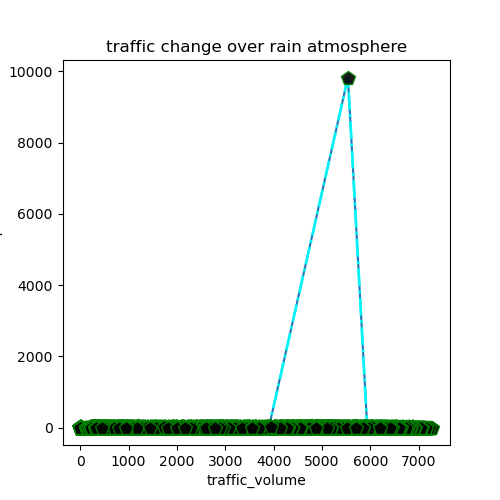

In [29]:
x=traffic_data["traffic_volume"]
y=traffic_data["rain_1h"]
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,y,color="cyan",linewidth=2.0,linestyle="-.",marker="p",markersize=10,markerfacecolor="Black",markeredgecolor='green',alpha=0.9)
plt.title("traffic change over rain atmosphere")
plt.xlabel("traffic_volume")
plt.ylabel("rain atmosphere")
plt.xticks(rotation=0)
plt.yticks(rotation=360)
plt.show()

<IPython.core.display.Javascript object>


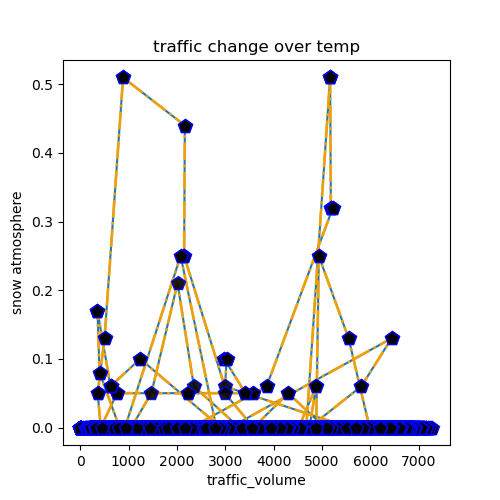

In [32]:
x=traffic_data["traffic_volume"]
y=traffic_data["snow_1h"]
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,y,color="orange",linewidth=2.0,linestyle="-.",marker="p",markersize=10,markerfacecolor="Black",markeredgecolor='blue',alpha=0.9)
plt.title("traffic change over temp")
plt.xlabel("traffic_volume")
plt.ylabel("snow atmosphere")
plt.xticks(rotation=0)
plt.yticks(rotation=360)
plt.show()

<IPython.core.display.Javascript object>


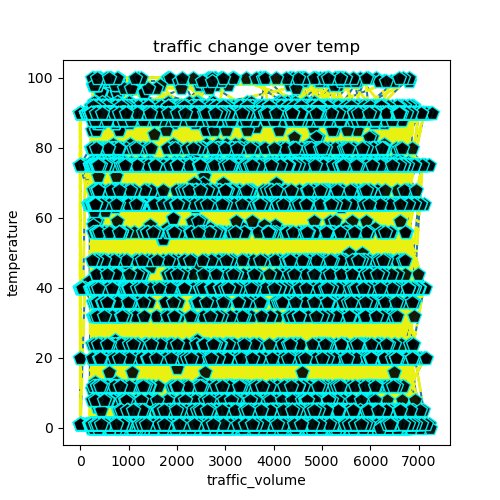

In [33]:
x=traffic_data["traffic_volume"]
y=traffic_data["clouds_all"]
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,y,color="yellow",linewidth=2.0,linestyle="-.",marker="p",markersize=10,markerfacecolor="Black",markeredgecolor='cyan',alpha=0.9)
plt.title("traffic change over temp")
plt.xlabel("traffic_volume")
plt.ylabel("temperature")
plt.xticks(rotation=0)
plt.yticks(rotation=360)
plt.show()

conclusion=asthere is no relarionship between temoerature snow,rain,cloudy atmosphere and traffic_volume and if there is there is relationship it  is very much weak so it seematemperature snow,rain,and cloudy atmosphre dies't addect trafficvolume  

# 4)traffic behaviour by weather_main

In [34]:
traffic_data["weather_main"].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

<IPython.core.display.Javascript object>


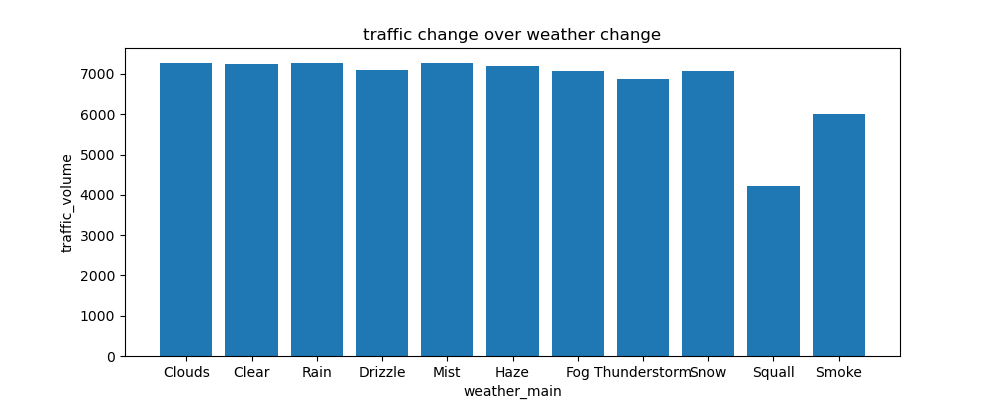

In [36]:
weather_main = traffic_data["weather_main"]
traffic_volume =traffic_data["traffic_volume"]
plt.figure(figsize=(10,4))
plt.bar(weather_main,traffic_volume)
plt.xlabel("weather_main")
plt.ylabel("traffic_volume")
plt.title("traffic change over weather change")
plt.show()

conclusion: in case of squll and smoky weather there is less traffic as compared with other types of ewather.

# 5)traffic behaviour by weather_desceiption

In [41]:
traffic_data["weather_description"].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

<IPython.core.display.Javascript object>


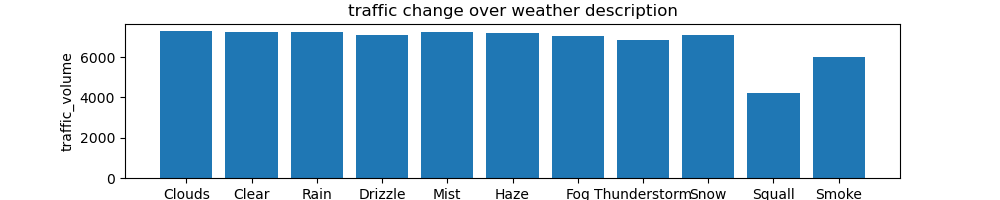

In [40]:
weather_description = traffic_data["weather_description"]
traffic_volume =traffic_data["traffic_volume"]
plt.figure(figsize=(10,2))
plt.bar(weather_main,traffic_volume)
plt.xlabel("weather_description")
plt.ylabel("traffic_volume")
plt.title("traffic change over weather description")
plt.show()

concluson:- in case of freezing rain thunderstorm with drissle and squaalls weather there is kess traffic as compared with over weather type